# Example No 1 : DNN model by Keras for handwritten digit recognition dataset 

### What is the new we will learn in this example ?
- We will use the same dataset stored in Keras itself for handwritten digit recognition, **MNIST dataset**. 
- However, in this example we will see the importance of applying rescaling for the data (both training and test) before we build our model. 

### What are the basic steps to build our NN model ?
> The same life cycle for any NN model as we mentioned in the previous tutorial. 
1. Load Data
2. Scaling data 
3. Define Keras Model
4. Compile Keras Model
5. Fit Keras Model
6. Evaluate Keras Model
4. Make Predictions

### 1. Load Data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
mnist = tf.keras.datasets.mnist


> We will divide our data into training and testing sets for the purpose of building our model.

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

### 2. Scaling data 

* What does it mean to scale our data?
    * Scaling the data refer to the process of transforming the feature values of your dataset to a similar scale. 
    * This is important because many ML algorithms, including NN in Keras, perform better when the input features are on a similar scale. 
    * Scaling helps prevent certain features from dominating others and ensures that the optimization process converges more smoothly.
    * We can do Scaling or Normalization by many methods as example here just divide over 255 as this is the maximum value. 
    * We can normalize the data also by normalization function *tf.keras.utils.normalize*, we will take about it later 

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### 3. Define Keras Model


In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### 4. Compile Keras Model


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 5. Fit Keras Model


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 0s 6ms/step - loss: 0.5634 - accuracy: 0.8453
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2405 - accuracy: 0.9320
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1832 - accuracy: 0.9482
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1465 - accuracy: 0.9589
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1224 - accuracy: 0.9649
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.1040 - accuracy: 0.9705
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0899 - accuracy: 0.9743
Epoch 8/10
60/60 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9776
Epoch 9/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0703 - accuracy: 0.9797
Epoch 10/10
60/60 [==============================] - 0s 7ms/step - loss: 0.0623 - accuracy: 0.9828


### 6. Evaluate Keras Model


In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('The accuracy of our model on test dataset : %.2f' % (val_acc*100))
print('The loss of our model on test dataset : %.2f' % (val_loss*100))

313/313 [==============================] - 0s 656us/step - loss: 0.0742 - accuracy: 0.9767
The accuracy of our model on test dataset : 97.67
The loss of our model on test dataset : 7.42


> Compare this value with the one obtained from the model without scaling!

* You can notice that the accuracy in the current case (with data scaling), 98% almost, while for the other case (without data scaling) it was around 90%. 
* Also the loss become much lower after scaling the data.
* As a result, the scaling enhance the efficiency of the NN model 

### 7. Make Predictions

> Executing the prediction function once over the entire dataset.

In [10]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 481us/step


> Let's see some cases and compare! you try any image number here as you want

The model predict the image as it is number :  5
And, the real image as follows 


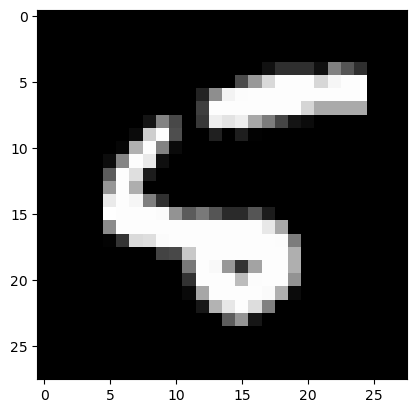

In [15]:
image_no = 8 # you can change the image number as you want

model_prediction = np.argmax(predictions[image_no])
print("The model predict the image as it is number : ", model_prediction)
print("And, the real image as follows ")
plt.imshow(x_test[image_no], cmap='gray');

&nbsp;

### For Keras basic tools & other examples
--------------------------------------
[Keras Basic Tools for DNN](../1_Keras_BasicTools_DNN.ipynb)

[Case Study No 2](Keras_CaseStudy_no2.ipynb) : To observe the impact of increasing the number of hidden layers on the model's accuracy.

[Case Study No 3](Keras_CaseStudy_no3.ipynb) : For image classification tasks involving fashion items, a challenging dataset is employed. 

[Case Study No 4](Keras_CaseStudy_no4.ipynb) : Utilizing Keras to construct a DNN for a regression model allows for the observation of early stopping in action.

[Case Study No 5](Keras_CaseStudy_no5.ipynb) : Dogs & Cats classifications to assess whether DNN  can effectively handle the image data or not! 

&nbsp;

### Refrences
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem?tab=repositories"> Hesham Asem GitHub for ML tools. </a>